<a href="https://colab.research.google.com/github/DianaElena99/DataScience-Crashcourse/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis (PCA)**

# Importing the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing the dataset

In [24]:
_dataset = pd.read_csv("wine.csv")
X = _dataset.iloc[: , :-1].values
Y = _dataset.iloc[: , -1].values

_dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

_scaler = StandardScaler()
X_train = _scaler.fit_transform(X_train)
X_test = _scaler.transform(X_test)

# Applying PCA

In [27]:
from sklearn.decomposition import PCA
_pca = PCA(n_components = 2)
X_train = _pca.fit_transform(X_train)
X_test = _pca.transform(X_test)

# Training Logistic Regression model on data set

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

_classifier = LogisticRegression(random_state = 0)
_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# Testing the model

In [36]:
y_pred = _classifier.predict(X_test)
_acc = accuracy_score(Y_test, y_pred)
_acc

0.9722222222222222

# Plot the Confusion Matrix

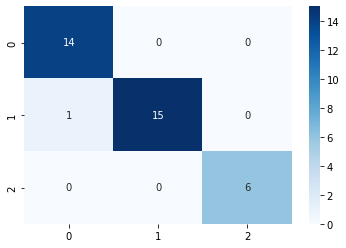

In [38]:
import seaborn as sn
_confmat = confusion_matrix(Y_test, y_pred)
sn.heatmap(_confmat, annot=True, cmap="Blues")